In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('df_pre.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_num=df.select_dtypes(include=np.number)
df_cat= df.select_dtypes(include=np.object)

In [ ]:
df_num.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Univariate Analysis



In [ ]:
#Catagorical data
#1. Count plots for each of the attributes
#2. Value_counts or unique catagory details



In [ ]:
for col in df_cat:
    print(df_cat[col].value_counts())


toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
gas       181
diesel     20
Name: fuel-type, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64
four

In [ ]:
df_cat.apply(lambda x:len(x.unique()))

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

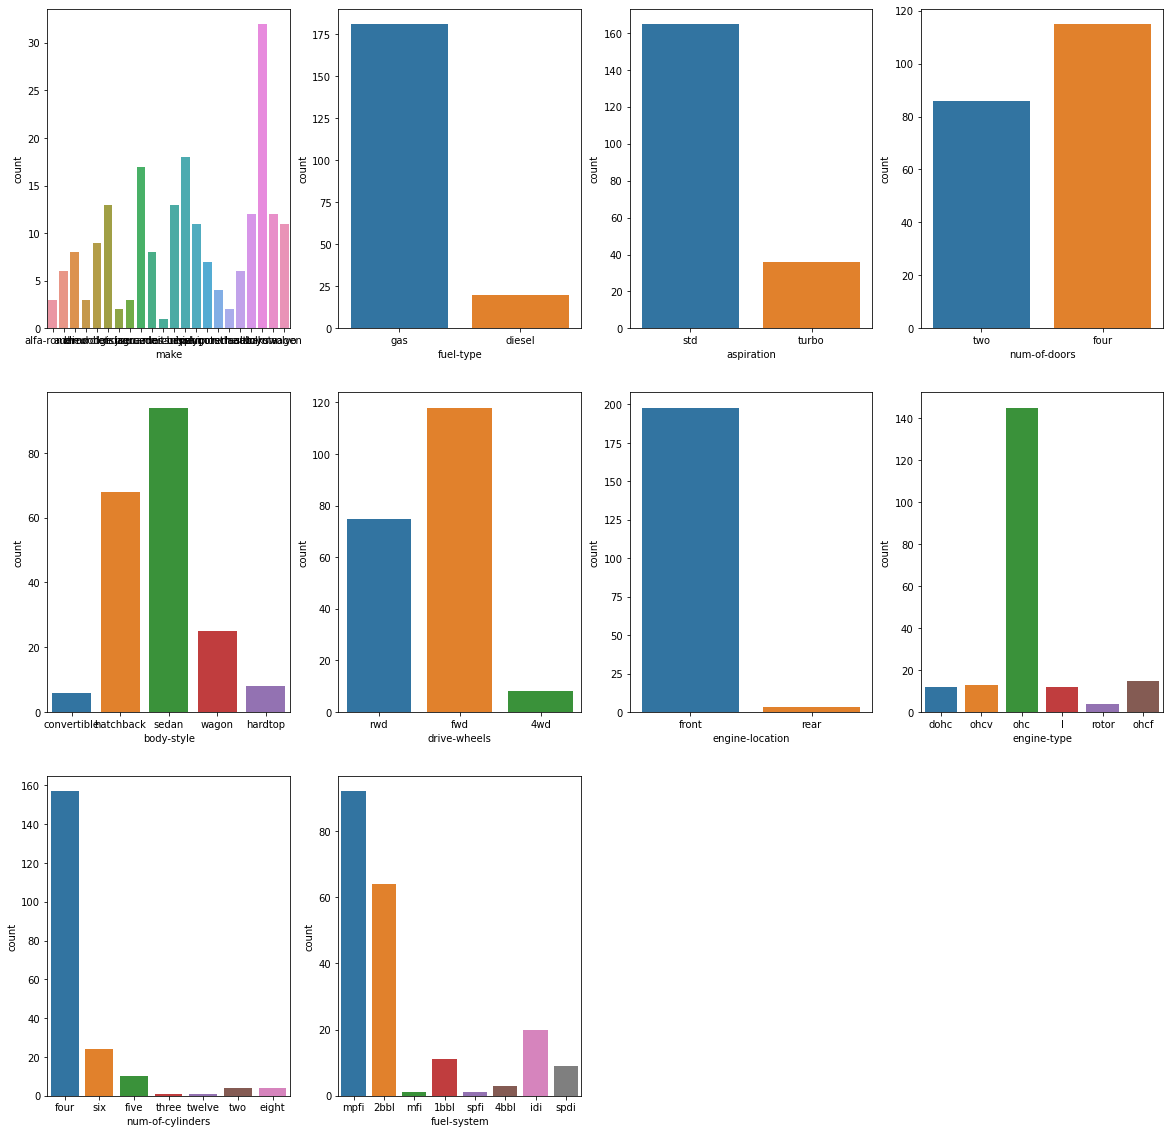

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df_cat:
    ax=plt.subplot(3,4,i)
    sns.countplot(df_cat[col])
    i+=1


### Findings

1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan

2. Most preferred fuel type for the customer is gas vs trubo having more than 80% of the choice

3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.



In [ ]:
df_num.price.isnull().sum()

0

In [ ]:
df_cat['Price']=df_num.price

In [ ]:
df_num['symboling'].value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
# Bivariate analysis

#1. Pandas Group_by, pivot table and crosstab
#2. Boxplot, Scatter plot, Violin plot, swarm plot, regplot

In [ ]:
# Groupby and pivot table
df.groupby('symboling')['price'].sum()

symboling
-2     47345.0
-1    381275.0
 0    935811.0
 1    501730.0
 2    323497.0
 3    464975.0
Name: price, dtype: float64

In [ ]:
df_cat.groupby('num-of-doors')['Price'].mean()

num-of-doors
four    13498.034783
two     12818.127907
Name: Price, dtype: float64

In [ ]:
df_cat.groupby('fuel-type')['Price'].mean()

fuel-type
diesel    15838.15000
gas       12916.40884
Name: Price, dtype: float64

In [ ]:
df_cat.groupby(['aspiration'])['Price'].mean()

aspiration
std      12542.181818
turbo    16254.805556
Name: Price, dtype: float64

In [ ]:
df.groupby('drive-wheels')['city-mpg'].mean()

drive-wheels
4wd    24.000000
fwd    28.152542
rwd    20.626667
Name: city-mpg, dtype: float64

In [ ]:
pd.pivot_table(df_cat,values='Price',index=['fuel-type'],columns=['engine-type'],aggfunc=np.sum)

engine-type,dohc,l,ohc,ohcf,ohcv,rotor
fuel-type,,,,,,
diesel,NaN,78985.0,237778.0,NaN,NaN,NaN
gas,217397.0,96546.0,1439489.0,206079.0,326279.0,52080.0


In [ ]:
pd.pivot_table(df_cat,values='Price',index=['engine-type'],columns=['num-of-cylinders'],aggfunc=np.sum)

num-of-cylinders,eight,five,four,six,three,twelve,two
engine-type,,,,,,,
dohc,NaN,NaN,85601.0,131796.0,NaN,NaN,NaN
l,NaN,NaN,170380.0,NaN,5151.0,NaN,NaN
ohc,NaN,220076.0,1259126.0,198065.0,NaN,NaN,NaN
ohcf,NaN,NaN,102495.0,103584.0,NaN,NaN,NaN
ohcv,155600.0,NaN,NaN,134679.0,NaN,36000.0,NaN
rotor,NaN,NaN,NaN,NaN,NaN,NaN,52080.0


In [ ]:
pd.crosstab(df_cat['engine-location'],df_cat['fuel-type'])

fuel-type,diesel,gas
engine-location,,
front,20,178
rear,0,3


In [ ]:
# Nummerical data
#1. Histograms, distplots, Kde plot, for each of the attributes
#2.  Measure of dispersion (Standard deviation/ variance)
#3. measure of average(mean, median)
#4. Skewness of each atttribute

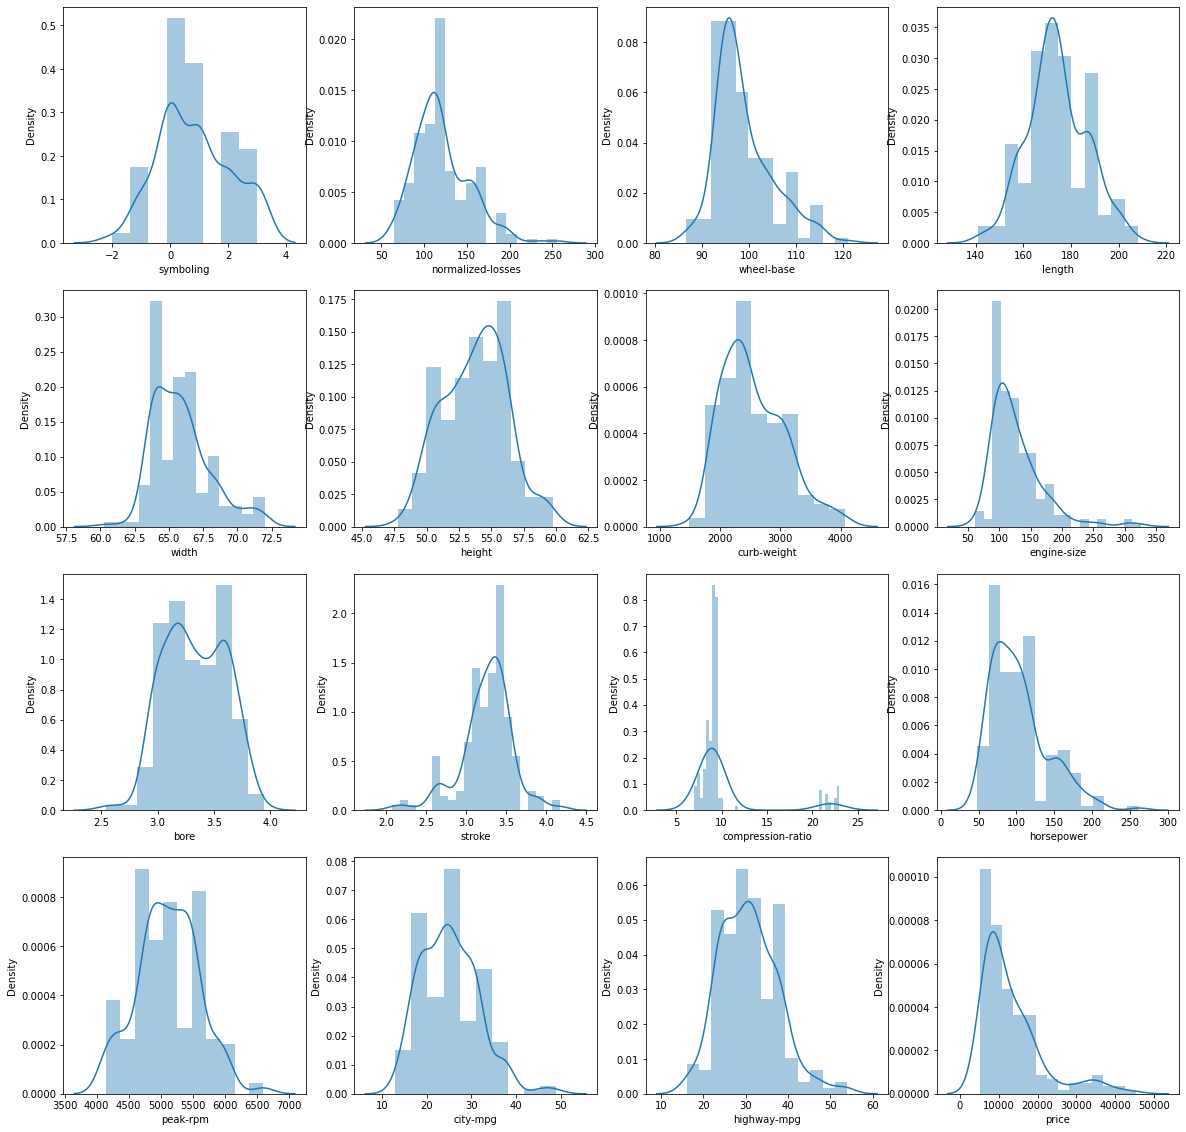

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df_num:
    ax=plt.subplot(4,4,i)
    sns.distplot(df_num[col])
    i+=1


In [ ]:
df_num.skew()

symboling            0.197370
normalized-losses    0.957177
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-size          1.979144
bore                -0.032730
stroke              -0.706744
compression-ratio    2.584462
horsepower           1.153019
peak-rpm             0.103069
city-mpg             0.680433
highway-mpg          0.549507
price                1.809675
dtype: float64

In [ ]:
df_num.std()

symboling               1.254802
normalized-losses      32.111623
wheel-base              6.066366
length                 12.322175
width                   2.101471
height                  2.447822
curb-weight           517.296727
engine-size            41.546834
bore                    0.268072
stroke                  0.316082
compression-ratio       4.004965
horsepower             37.374942
peak-rpm              478.183493
city-mpg                6.423220
highway-mpg             6.815150
price                7947.066342
dtype: float64

In [ ]:
df_num.var()

symboling            1.574527e+00
normalized-losses    1.031156e+03
wheel-base           3.680079e+01
length               1.518360e+02
width                4.416180e+00
height               5.991833e+00
curb-weight          2.675959e+05
engine-size          1.726139e+03
bore                 7.186252e-02
stroke               9.990753e-02
compression-ratio    1.603975e+01
horsepower           1.396886e+03
peak-rpm             2.286595e+05
city-mpg             4.125776e+01
highway-mpg          4.644627e+01
price                6.315586e+07
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

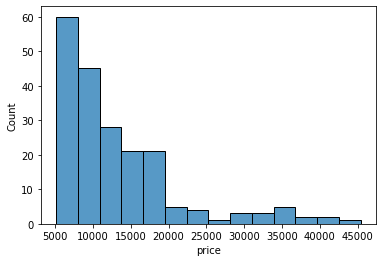

In [ ]:
sns.histplot(df_num['price'])

In [ ]:
df_num.price.mean()

13207.129353233831

In [ ]:
df_num.price.median()

10295.0

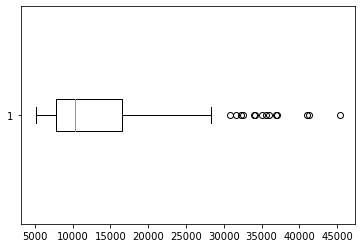

In [ ]:
ax=plt.boxplot(df_num.price,vert=False)

In [ ]:
df_num.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
q3=df_num.price.quantile(.75)
q1=df_num.price.quantile(.25)
IQR=q3-q1


In [ ]:
#IQR
lower_whisker=df_num.price[df_num.price<(q1-1.5*IQR)].min()
upper_whisker=df_num.price[df_num.price>(q3+1.5*IQR)].max()
upper_whisker

45400.0

In [ ]:
lower_whisker

nan

### Findings

1. Curb weight of the cars are distributed between 1500 and 4000 approximately
2. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.

3. Normalized losses which is the average loss payment per insured vehicle year  has more number of cars in the range between 65 and 150

## Bivariate Analysis

In [ ]:
#1. Relationship between features and the target attribute
#2. Relationship between features with all other features (numerical)

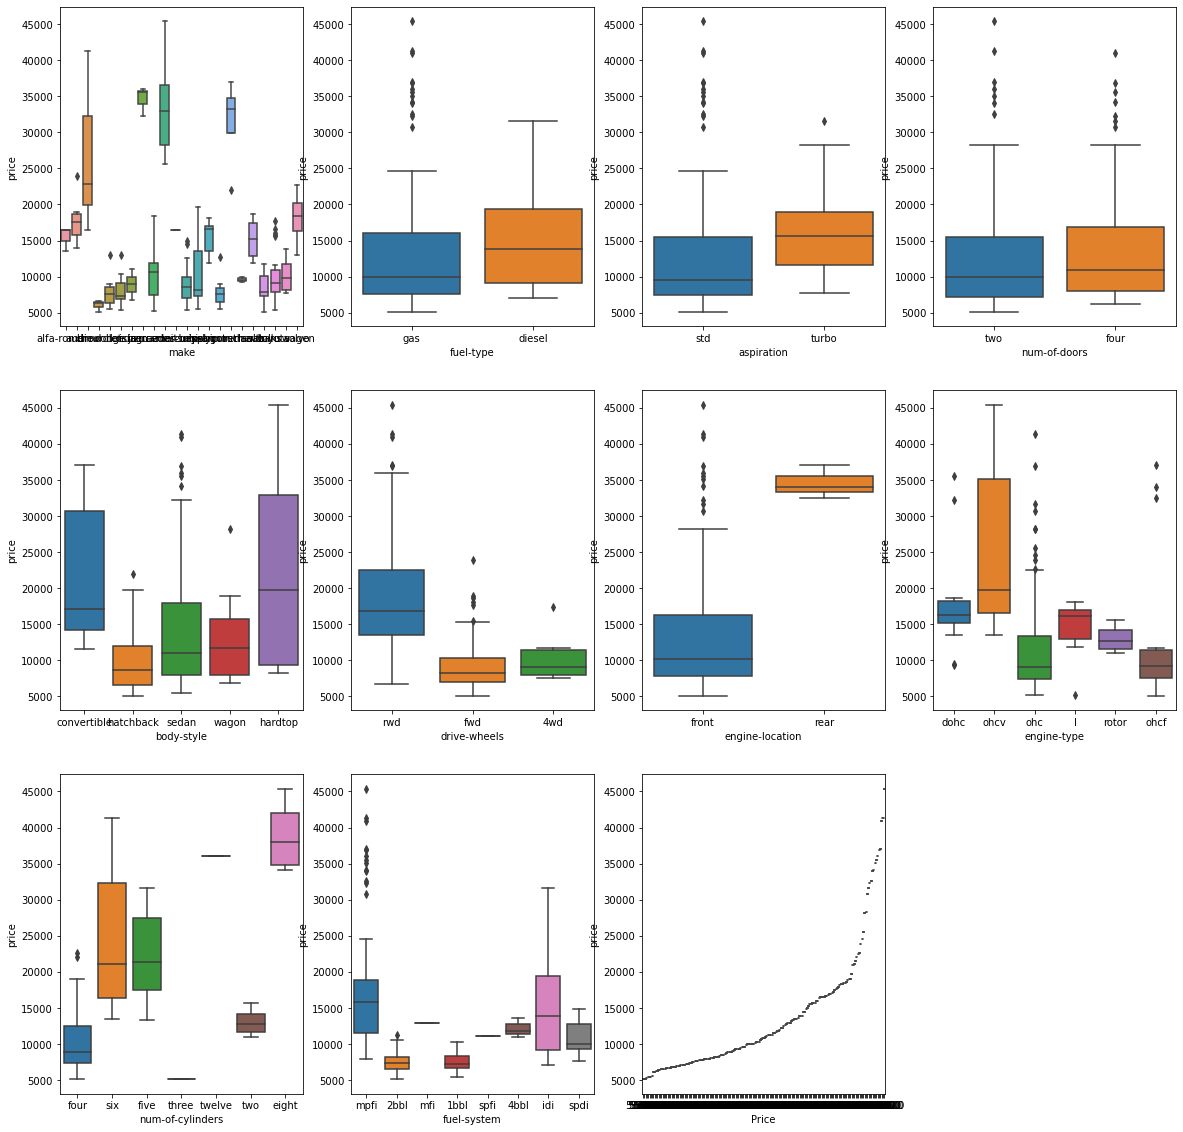

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df_cat:
    plt.subplot(3,4,i)
    sns.boxplot(df_cat[col],df_num.price)
    i+=1

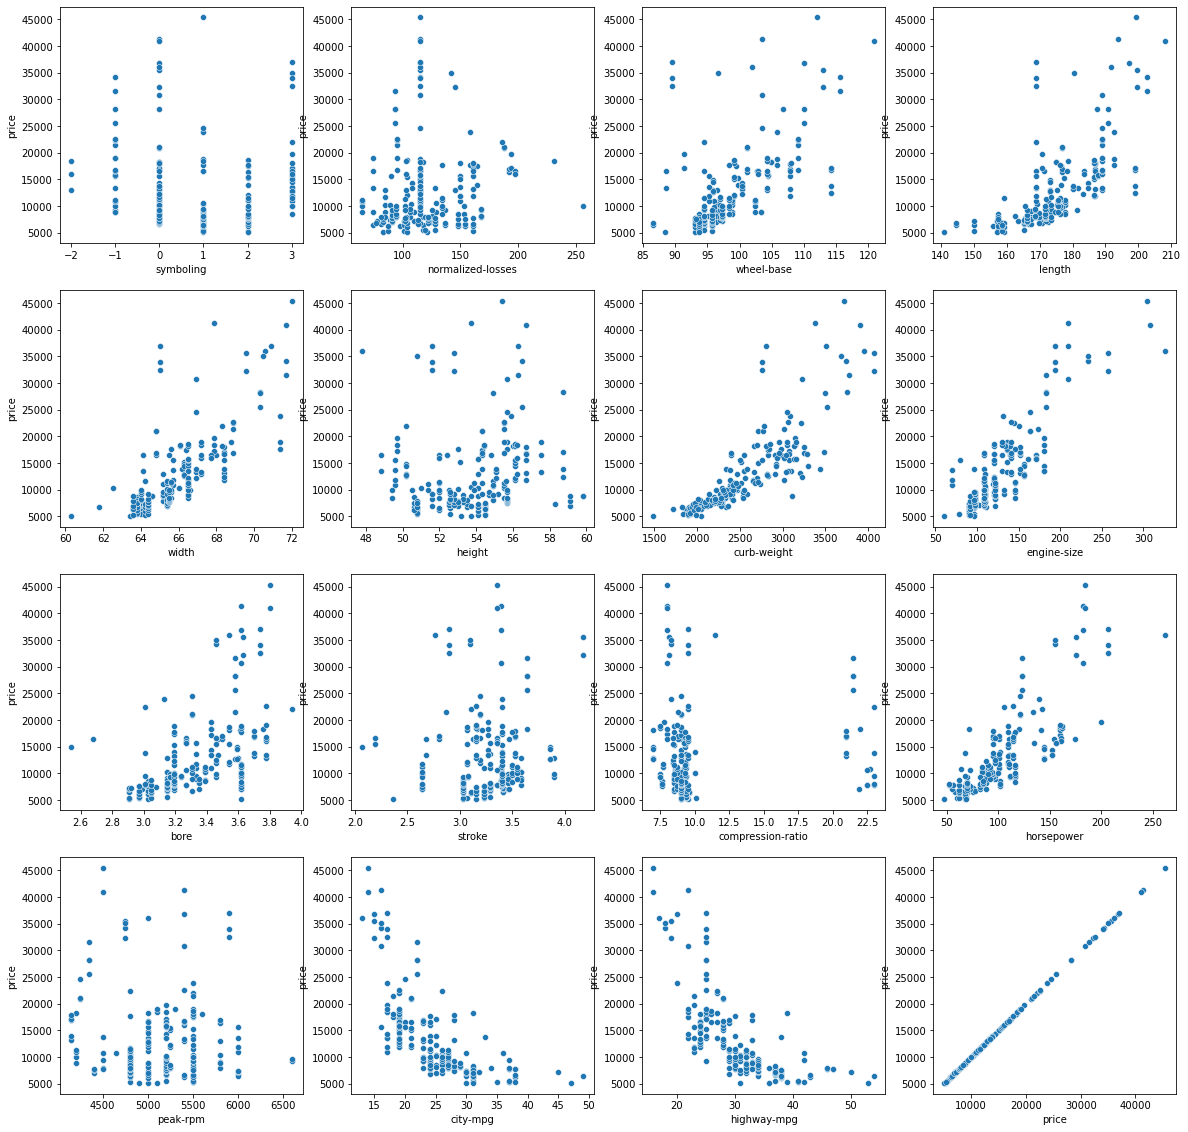

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df_num:
    plt.subplot(4,4,i)
    sns.scatterplot(df_num[col],df_num.price)
    i+=1

## Multivariate Analysis

In [ ]:
#1. Pair plot
#2. Scatter plot with 3 variables
#3. Correlation matrix

In [ ]:
sns.pairplot(df_num)

In [ ]:
g = sns.pairplot(df_automobile[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

In [ ]:
corr_matrix=df_num.corr()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
[column for column in upper.columns if any(abs(upper[column]) > 0.6)]

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),annot=True)

###Findings
#1.  Following attributes are having good correlation with the price column

       width    .75
       curb-weight  .83
       engine size  .87
       stroke     .82
       horse power   .81
       highway mpg  -.7

2. Following attributtes are having strong corleation
       highway-mpg and city mpg   .97
       city mpg and horsepower   -.8
       enginesize and horsepower .81
       curb weight and engine size .85
       length and width   .83
       curb weight and length
       curb weight and width

In [ ]:
### Findings

